In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Calculating Masks
def create_Masks(mask):
    # edge definition
    edges = cv2.Canny(mask,100,200)
    kernel = np.ones((11,11))
    dilated_edge = cv2.dilate(edges, kernel, iterations=1)
    inv_edge     = cv2.bitwise_not(dilated_edge)

    # Inverting the mask 
    mask_inverted = cv2.bitwise_not(mask)

    # Normalize to the range [0., 1.]
    mask = mask.astype(np.float64) / 255.
    mask_inverted = mask_inverted.astype(np.float64) / 255.
    dilated_edge = dilated_edge.astype(np.float64) / 255.
    inv_edge     = inv_edge.astype(np.float64) / 255.

    zone0 = mask * inv_edge
    zone1 = mask_inverted * inv_edge

    fullmask = zone0*1 + dilated_edge*2 +zone1*3

    return dilated_edge, zone0, zone1, fullmask


def sampleBreak(sample, mask):
    dilated_edge, zone0, zone1, fullmask = create_Masks(mask)
    sample_dilated_edge = sample * dilated_edge
    sample_reduced  = sample * zone0
    sample_inverted = sample * zone1
    return sample_dilated_edge, sample_reduced, sample_inverted

def incomplete(mask):
    # The texture can be synthesized while the mask has unfilled entries.
    mh, mw = mask.shape[:2]
    num_completed = np.count_nonzero(mask)
    num_incomplete = (mh * mw) - num_completed
    return num_incomplete 
    
def load(path):
    sample = cv2.imread(path)
    sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
    return sample

In [74]:
sample_path="tgs_salt/1bd1c8c771.png"
sample_semantic_mask_path="tgs_salt/1bd1c8c771Mask.png"
generat_mask_path="tgs_salt/0bdd44d530Mask.png" 

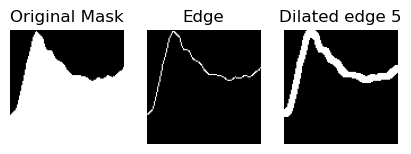

In [4]:
mask = cv2.imread("tgs_salt/1bd1c8c771Mask.png")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(mask,100,200)
kernel = np.ones((5,5))
dilated_edge = cv2.dilate(edges, kernel, iterations=1)
# plt imshow 3 columns
plt.figure(figsize=(5,5))
plt.subplot(131),plt.imshow(mask,cmap = 'gray')
plt.title('Original Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(133),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Dilated edge 5'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [24]:
img= cv2.imread(sample_path)

In [30]:
lines

array([[[ 19.        ,   0.17453292]],

       [[ 23.        ,   0.2617994 ]],

       [[ 17.        ,   0.17453292]],

       [[ 21.        ,   0.2617994 ]],

       [[-13.        ,   2.3561945 ]],

       [[-11.        ,   2.3561945 ]],

       [[ 27.        ,   1.7453291 ]]], dtype=float32)

In [4]:
sample_path="tgs_salt/1bd1c8c771.png"
original = cv2.imread(sample_path)

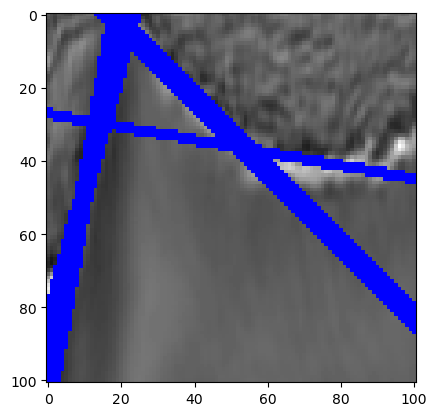

In [27]:
original = cv2.imread(sample_path)
edges = cv2.Canny(original,100,200)

# This returns an array of r and theta values
lines  = cv2.HoughLines(edges, 1, np.pi/36, 30)
 # Probabilistic Line Transform
linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, None, 50, 10)

img  = original.copy()
imgP = original.copy()

# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
	arr = np.array(r_theta[0], dtype=np.float64)
	r, theta = arr
	a = np.cos(theta)
	b = np.sin(theta)
	x0 = a*r
	y0 = b*r
	x1 = int(x0 + 1000*(-b))
	y1 = int(y0 + 1000*(a))
	x2 = int(x0 - 1000*(-b))
	y2 = int(y0 - 1000*(a))
	cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Draw the lines
if linesP is not None:
	for i in range(0, len(linesP)):
		l = linesP[i][0]
		cv2.line(imgP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)	

# All the changes made in the input image are finally
# written on a new image houghlines.jpg
#cv2.imwrite('masklinesDetected.jpg', img)
plt.imshow(img)
plt.show()

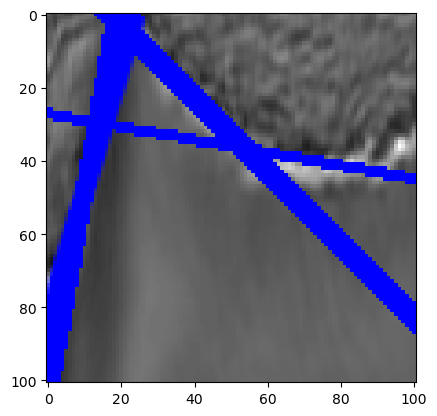

In [25]:
# All the changes made in the input image are finally
# written on a new image houghlines.jpg
cv2.imwrite('masklinesDetected.jpg', original)
plt.imshow(img)
plt.show() 

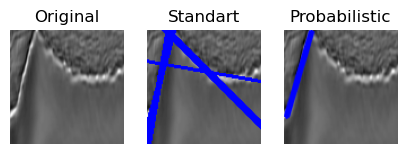

In [28]:
# plt imshow 3 columns
plt.figure(figsize=(5,5))
plt.subplot(131),plt.imshow(original,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(132),plt.imshow(img,cmap = 'gray')
plt.title('Standart'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(133),plt.imshow(imgP,cmap = 'gray')
plt.title('Probabilistic'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

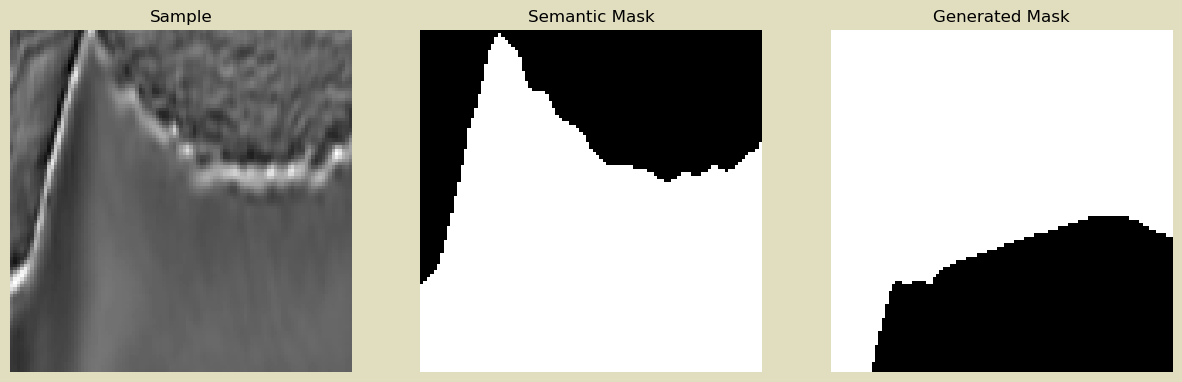

In [11]:
sample = load(sample_path)
sample_semantic_mask = load(sample_semantic_mask_path)
generat_mask = load(generat_mask_path)

plt.figure(figsize=(15,15),facecolor="#e1ddbf")
plt.subplot(131),plt.imshow(sample,cmap = 'gray')
plt.title('Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(132),plt.imshow(sample_semantic_mask,cmap = 'gray')
plt.title('Semantic Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(133),plt.imshow(generat_mask,cmap = 'gray')
plt.title('Generated Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [12]:
sample = cv2.imread("tgs_salt/1bd1c8c771.png")
# Convert original to sample representation.
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)

# Convert sample to floating point and normalize to the range [0., 1.]
sample = sample.astype(np.float64)
sample = sample / 255.

In [14]:
sample_dilated_edge, sample_reduced, sample_inverted = sampleBreak(sample, sample_semantic_mask)
#show images

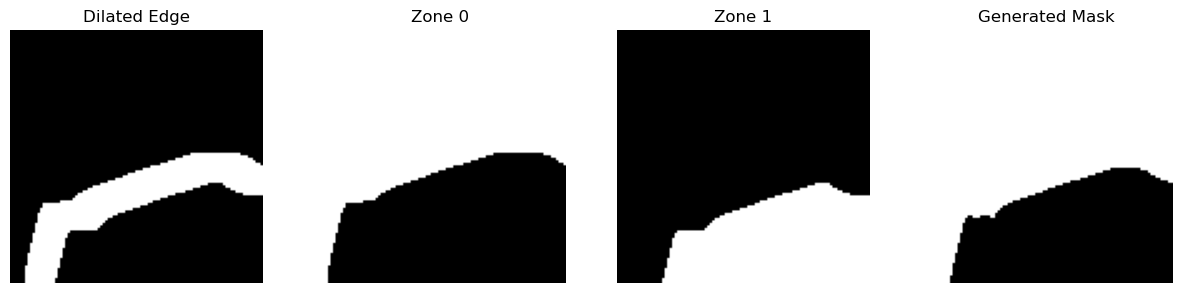

In [16]:
dilated_edge, zone0, zone1, fullmask = create_Masks(generat_mask)
#show images
plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Dilated Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(142),plt.imshow(zone0,cmap = 'gray')
plt.title('Zone 0'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(143),plt.imshow(zone1,cmap = 'gray')
plt.title('Zone 1'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(144),plt.imshow(generat_mask,cmap = 'gray')
plt.title('Generated Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()


NameError: name 'zone0' is not defined

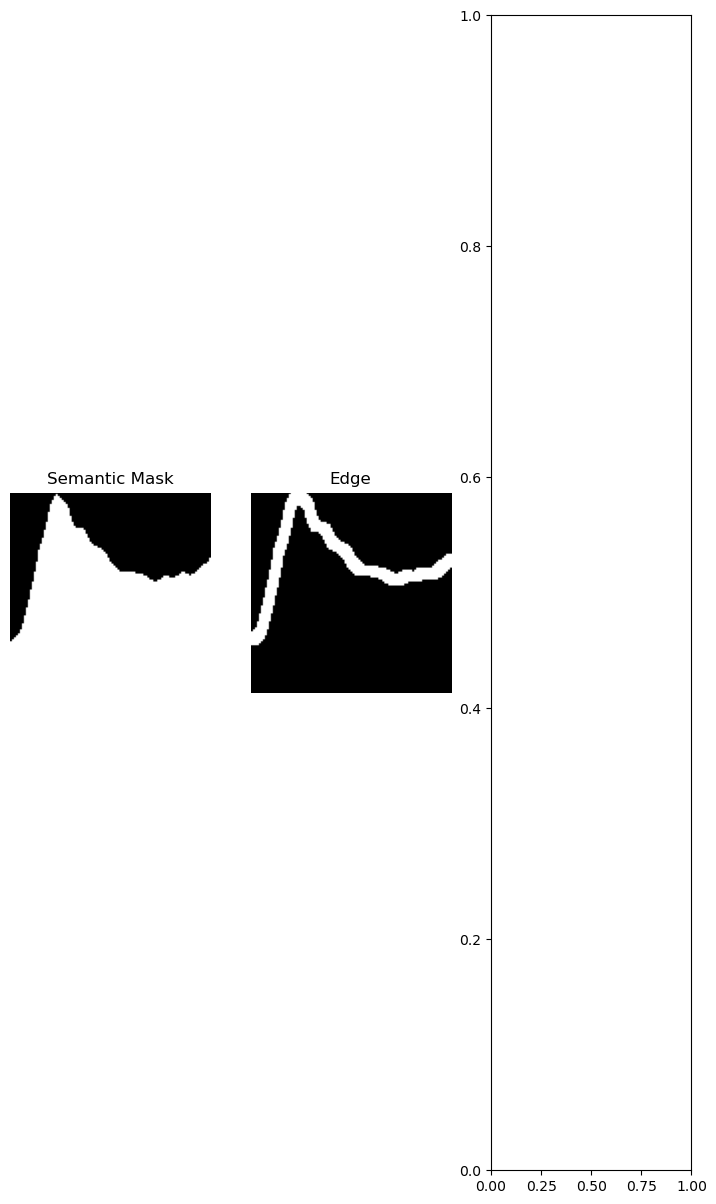

In [15]:
#show dilated_edge, semantic_mask, reduced_semantic_mask, reduced_inverted_mask
plt.figure(figsize=(15,15))

plt.subplot(151),plt.imshow(sample_semantic_mask,cmap = 'gray')
plt.title('Semantic Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(152),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(153),plt.imshow(zone0,cmap = 'gray')
plt.title('Zone 0 mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(154),plt.imshow(zone1,cmap = 'gray')
plt.title('Zone 1 Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(155),plt.imshow(fullmask,cmap = 'gray')
plt.title('Gerational Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

# Sample x mask

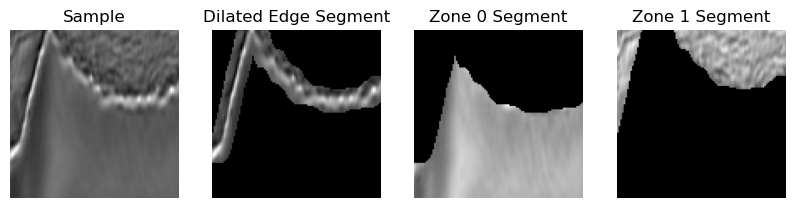

In [26]:
# show sample, dilated_edge_sample, reduced_sample, inverted_sample
plt.figure(figsize=(10,10))
plt.subplot(141),plt.imshow(sample,cmap = 'gray')
plt.title('Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(142),plt.imshow(sample_dilated_edge,cmap = 'gray')
plt.title('Dilated Edge Segment'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(143),plt.imshow(sample_reduced,cmap = 'gray')
plt.title('Zone 0 Segment'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(144),plt.imshow(sample_inverted,cmap = 'gray')
plt.title('Zone 1 Segment'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [1]:
plt.figure(figsize=(15,15))
plt.subplot(151),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Dilated Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(152),plt.imshow(zone0,cmap = 'gray')
plt.title('Zone 0'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(153),plt.imshow(zone1,cmap = 'gray')
plt.title('Zone 1'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(154),plt.imshow(generat_mask,cmap = 'gray')
plt.title('Generational Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(155),plt.imshow(sample,cmap = 'gray')
plt.title('Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

NameError: name 'plt' is not defined

# Load images and show

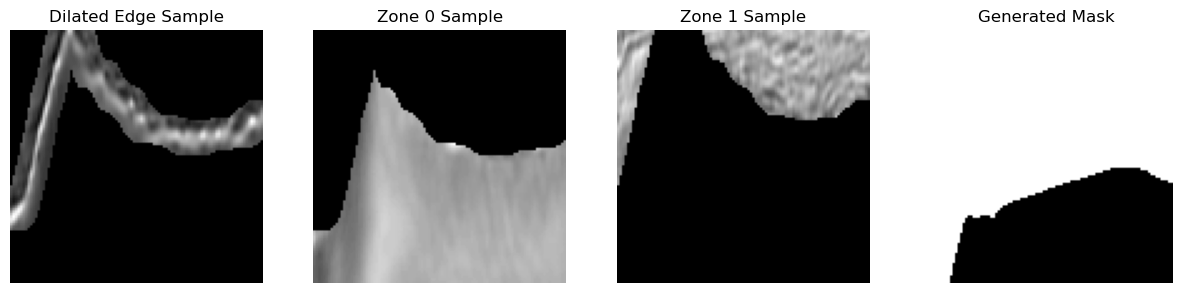

In [23]:
plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(sample_dilated_edge,cmap = 'gray')
plt.title('Dilated Edge Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(142),plt.imshow(sample_reduced,cmap = 'gray')
plt.title('Zone 0 Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(143),plt.imshow(sample_inverted,cmap = 'gray')
plt.title('Zone 1 Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(144),plt.imshow(generat_mask,cmap = 'gray')
plt.title('Generated Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()


In [29]:
generat_mask
incomplete(generat_mask)

3243